# INTRODUCTION:

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.
Source
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Features of the data:
 Sex: male or female(Nominal)
• Age: Age of the patient;
Behavioral
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• Tot Chol: total cholesterol level (Continuous)
• Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
• Glucose: glucose level (Continuous)
Predict variable (desired target)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

# INDEX:
1. Data preprocessing:
    1.1 Loading Dataset
    1.2 Heatmap to see correlation
    1.3 Checking and imputing null values
    1.4 Finding Chi squared values
    1.5 Checking and removing Outliers
2. Logistic Regression model
3. KNN
4. Random Forest model
5. Support Vector Machine
6. Naive Bayes
7. AdaBoost classifier
8. Gradient Boost classifier
9. Maximum Voting Classifier
10. Final analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [109]:
df=pd.read_csv(r"D:\DHRUVA\datasets\discrete.csv")

In [109]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Heatmap to show correlation between the variables

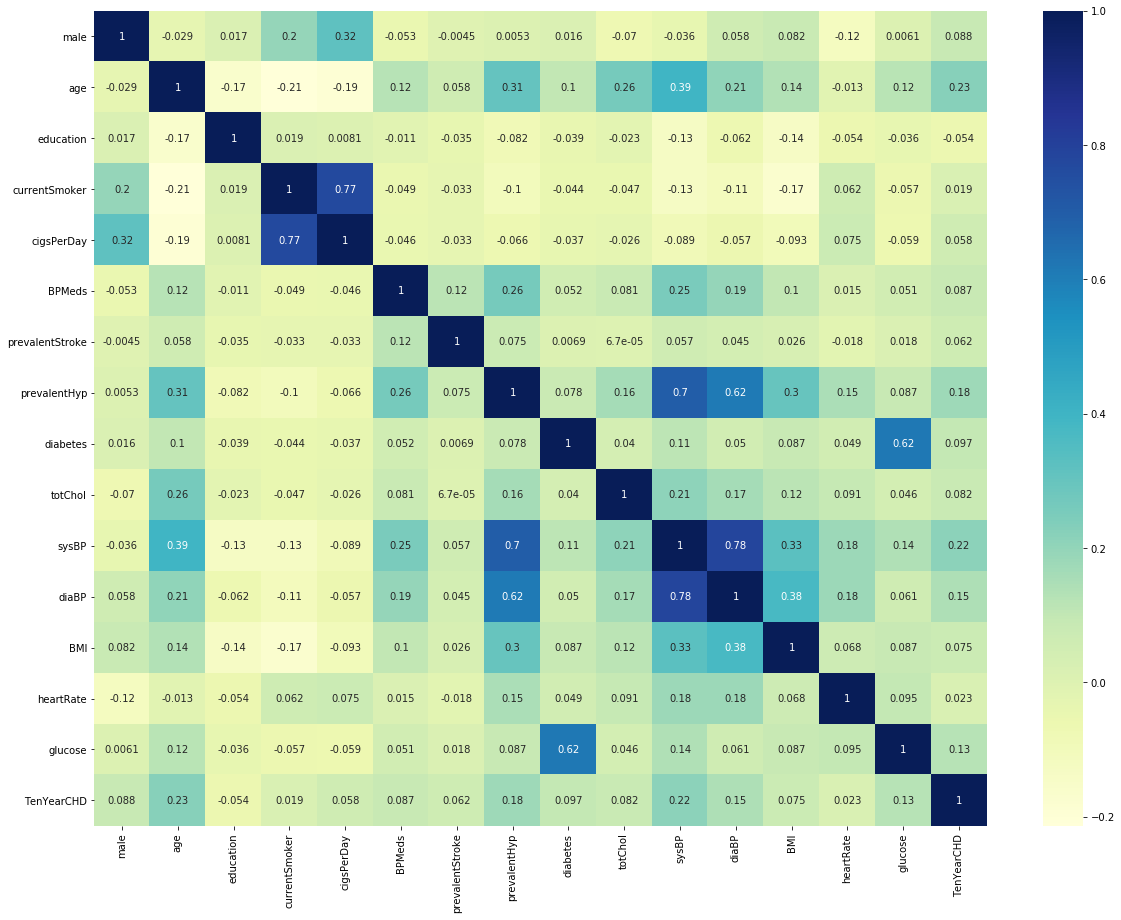

In [4]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [5]:
#by looking at the p values and the above heatmap, we see the following corr values
#cigsperday~currentsmoker 0.77
#prevalenthyp~sysbp 0.7
#prevalenthyp~diabp 0.62
#sysbp~diabp 0.78
#glucose~diabetes 0.62

# Numeric Correlation

In [7]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


# Checking the number of null values in the dataset

In [10]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Filling columns with continuous values with their individual means

In [110]:

for column in ["totChol","BMI","glucose","heartRate"]:
    df[column].fillna(df[column].mean(),inplace=True)


# Filling columns with discrete values with their mode

In [111]:
for column in ["education","cigsPerDay","BPMeds"]:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Finding the best features using the chi-squared values

A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

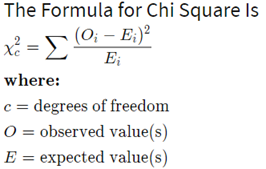

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

>link: https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

In [14]:
x=df.iloc[:,0:15]
y=df.iloc[:,15]

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
bf=SelectKBest(score_func=chi2,k=10)
fit=bf.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feats','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


           Feats       Score
10         sysBP  728.292522
14       glucose  390.825416
1            age  318.597444
9        totChol  234.305978
4     cigsPerDay  232.565768
11         diaBP  153.090954
7   prevalentHyp   92.167857
8       diabetes   39.103710
5         BPMeds   30.723031
0           male   18.915212


In [1]:
#From the heatmap and the chi squared values we decide to take:
#sysBP,glucose,age,totChol,cigsPerDay,male
#we cant take diaBP or prevalenthyp coz they have a high correlation with sysBP.
#we have taken glucose so can't take diabetes.
#So we take the gender column

# Checking the outliers

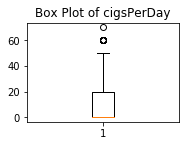

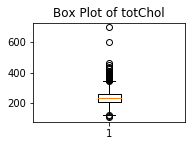

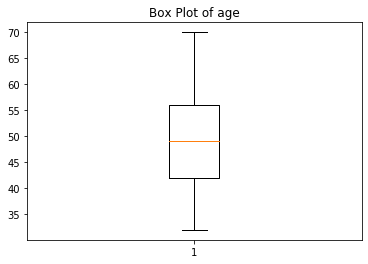

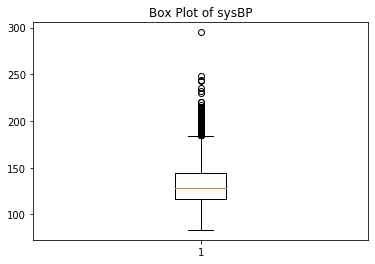

In [56]:
plt.subplot(2,2,1)
plt.boxplot(df['cigsPerDay'])
plt.title('Box Plot of cigsPerDay')
plt.show()
plt.subplot(2,2,2)
plt.boxplot(df['totChol'])
plt.title('Box Plot of totChol')
plt.show()
#plt.subplot(2,2,3)
plt.boxplot(df['age'])
plt.title('Box Plot of age')
plt.show()
#plt.subplot(2,2,4)
plt.boxplot(df['sysBP'])
plt.title('Box Plot of sysBP')
plt.show()

In [45]:
df[df['sysBP']>180].shape


(158, 16)

In [46]:
df[df['cigsPerDay']>50].shape

(12, 16)

In [47]:
df[df['totChol']>350].shape

(50, 16)

# Defining a function to remove the outliers

The IQR tells how spread out the "middle" values are; it can also be used to tell when some of the other values are "too far" from the central value. These "too far away" points are called "outliers", because they "lie outside" the range in which we expect them.

The IQR is the length of the box in your box-and-whisker plot. An outlier is any value that lies more than one and a half times the length of the box from either end of the box.

In [112]:
def outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
 

In [113]:
#We remove the outliers only from these two columns because the other columns have too many outliers
cols=["cigsPerDay","sysBP"]
for i in cols:
    lowerbound,upperbound = outlier(df[i])
    df.drop(df[ (df[i] > upperbound) | (df[i] < lowerbound) ].index , inplace=True)
    


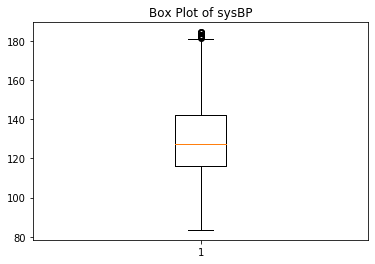

In [114]:
plt.boxplot(df['sysBP'])
plt.title('Box Plot of sysBP')
plt.show()

### IT IS BETTER TO REMOVE OUTLIERS OF SYSBP THAN TOTCHOL BECAUSE THE ACCURACY IMPROVES

# Fitting the model

>Logistic regression (LR) is a statistical method similar to linear regression since LR finds an equation that predicts an outcome for a binary variable, Y, from one or more response variables, X. However, unlike linear regression the response variables can be categorical or continuous, as the model does not strictly require continuous data. To predict group membership, LR uses the log odds ratio rather than probabilities and an iterative maximum likelihood method rather than a least squares to fit the final model.

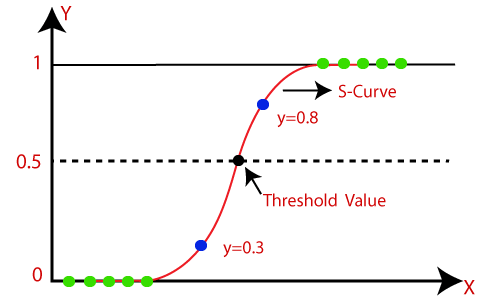

The logistic function, also called the sigmoid function was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

1 / (1 + e^-value)

In [115]:
from sklearn.linear_model import LogisticRegression
mod0=LogisticRegression()

In [116]:
from sklearn.model_selection import train_test_split
x=df[["sysBP","glucose","age","totChol","cigsPerDay","male"]]
y=df["TenYearCHD"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [117]:
mod0.fit(x_train,y_train)
y_pred=mod0.predict(x_test)


In [118]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [119]:
result_lr=accuracy_score(y_test,y_pred)
result_lr

0.8682926829268293

In [57]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1060
           1       1.00      0.05      0.09       170

    accuracy                           0.87      1230
   macro avg       0.93      0.52      0.51      1230
weighted avg       0.89      0.87      0.81      1230



In [58]:
confusion_matrix(y_test,y_pred)

array([[1060,    0],
       [ 162,    8]], dtype=int64)

#  KNN

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. The following two properties would define KNN well −

Lazy learning algorithm − KNN is a lazy learning algorithm because it does not have a specialized training phase and uses all the data for training while classification.

Non-parametric learning algorithm − KNN is also a non-parametric learning algorithm because it doesn’t assume anything about the underlying data.

>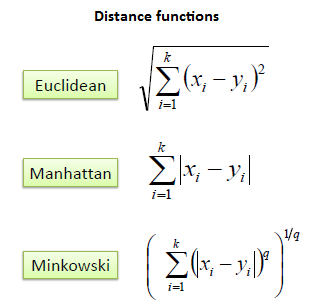

Diagram to show how knn works:

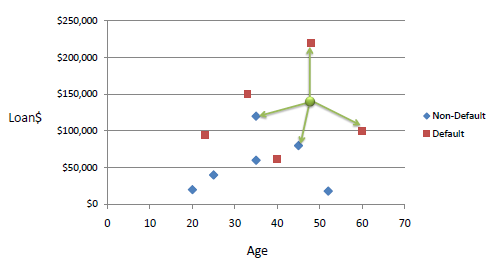

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Checking scores for K values from 1 to 25

In [126]:
for i in range(1,25):
    mod1=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)
    mod1.fit(x_train,y_train)
    y_pred=mod1.predict(x_test)
    print(accuracy_score(y_test,y_pred))
    
    


0.7731707317073171
0.8455284552845529
0.8260162601626017
0.848780487804878
0.8390243902439024
0.8512195121951219
0.8463414634146341
0.8552845528455284
0.8520325203252033
0.8577235772357723
0.8552845528455284
0.859349593495935
0.8577235772357723
0.8609756097560975
0.8609756097560975
0.8617886178861789
0.8617886178861789
0.8617886178861789
0.8626016260162601
0.8634146341463415
0.8617886178861789
0.8609756097560975
0.8626016260162601
0.8617886178861789


# For k = 20 we achieved highest accuracy

In [127]:
mod1=KNeighborsClassifier(n_neighbors=20,metric='minkowski',p=2)
mod1.fit(x_train,y_train)
y_pred=mod1.predict(x_test)
result_knn=accuracy_score(y_test,y_pred)
result_knn

0.8634146341463415

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1054
           1       0.50      0.01      0.02       197

    accuracy                           0.84      1251
   macro avg       0.67      0.50      0.47      1251
weighted avg       0.79      0.84      0.77      1251



# Random Forest

>Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

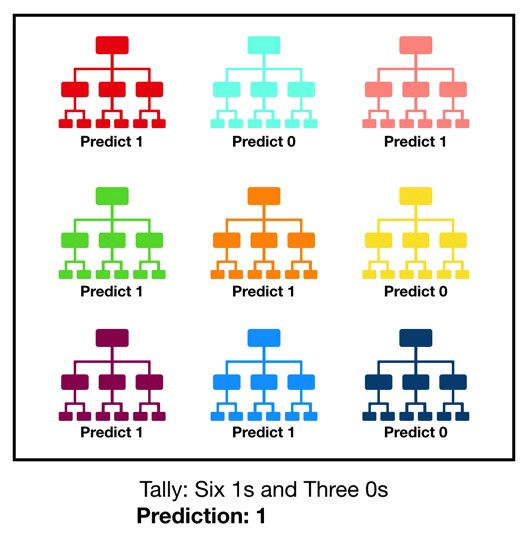

>The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.
 While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.
 
>link for a good random forest explanation:https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Checking different number of trees

In [142]:
n_list=[50,100,130,170,200]
for i in n_list:
    rf=RandomForestClassifier(n_estimators=i, criterion="gini", oob_score=True)
    rf.fit(x_train,y_train)
    print("Trees: ", i)
    print("Accuracy score (test): ",(rf.score(x_test, y_test)))
    

Trees:  50
Accuracy score (test):  0.8528455284552846
Trees:  100
Accuracy score (test):  0.8552845528455284
Trees:  130
Accuracy score (test):  0.8528455284552846
Trees:  170
Accuracy score (test):  0.8552845528455284
Trees:  200
Accuracy score (test):  0.859349593495935


# 50 trees give us the maximum accuracy

In [138]:
#creating model based on training dataset
rf01  = RandomForestClassifier(n_estimators=200 , criterion="gini", oob_score=True)
rf01.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
#getting predictions for training dataset
pred_rf01_test = rf01.predict(x_test)

In [140]:
#calculating accuracy
result_rf = accuracy_score(y_test, pred_rf01_test)
print("The accuracy of model rf02 for test dataset is: ", result_rf*100)

The accuracy of model rf02 for test dataset is:  85.52845528455283


# SVM

>Support Vector Machine is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well

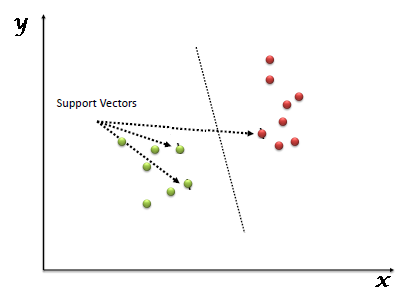

>Support Vectors are simply the co-ordinates of individual observation. The SVM classifier is a frontier which best segregates the two classes (hyper-plane/ line).

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [70]:
#we now define the range of parameters to be grid tested
params_grid = {'C' : [0.1, 1, 10, 100, 1000],
               'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
               'kernel' : ['rbf']}

>A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. However, there are some parameters, known as Hyperparameters and those cannot be directly learned. They are commonly chosen by human based on some intuition or hit and trial before the actual training begins.
SVM also has some hyper-parameters (like what C or gamma values to use) and finding optimal hyper-parameter is a very hard task to solve. But it can be found by just trying all combinations and see what parameters work best. The main idea behind it is to create a grid of hyper-parameters and just try all of their combinations.
>GridSearchCV takes a dictionary that describes the parameters that could be tried on a model to train it. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

>link: https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

In [40]:
#initiating the grid search
grid_search = GridSearchCV(SVC(), params_grid, refit=True, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.854, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.852, total=   1.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.852, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=   0.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.854, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.852, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.801, total=   0.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.807, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.817, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.798, total=   0.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.808, total=   0.4s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.850, total=   0.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.843, total=   0.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.801, total=   5.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.791, total=   5.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.854, total=  15.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.848, total=  10.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.855, total=   9.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.852, total=  10.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.850, total=   7.5s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [41]:
#gridsearch iterates over each parameter combination from the dictionary params_grid 
#it chooses the best set of parameters for which the model has the highest accuracy

In [42]:
#getting the best parameters
print(grid_search.best_params_)

#getting details about model after hyper_parameter tuning
print(grid_search.best_estimator_)

{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [66]:
#creating model based on optimum parameters
svm_01 = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
svm_01.fit(x_train, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
#getting predictions
pred_svm_02 = svm_01.predict(x_test)

In [69]:
#getting classification report and accuracy
print(classification_report(y_test, pred_svm_02))
result_svm = accuracy_score(y_test, pred_svm_02)
print("The accuracy of model svm_02 is: ", result_svm*100)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1060
           1       0.60      0.04      0.07       170

    accuracy                           0.86      1230
   macro avg       0.73      0.52      0.50      1230
weighted avg       0.83      0.86      0.81      1230

The accuracy of model svm_02 is:  86.34146341463415


# Naive Bayes:

>Bayes’ Theorem finds the probability of an event occurring given the probability of another event that has already occurred. Bayes’ theorem is stated mathematically as the following equation:
P(A|B) = \frac{P(B|A) P(A)}{P(B)} 
where A and B are events and P(B) ? 0.
Basically, we are trying to find probability of event A, given the event B is true. Event B is also termed as evidence.
P(A) is the priori of A (the prior probability, i.e. Probability of event before evidence is seen). The evidence is an attribute value of an unknown instance(here, it is event B).
P(A|B) is a posteriori probability of B, i.e. probability of event after evidence is seen.


>Naive Bayes is a family of probabilistic algorithms that take advantage of probability theory and Bayes’ Theorem to predict the tag of a text (like a piece of news or a customer review). They are probabilistic, which means that they calculate the probability of each tag for a given text, and then output the tag with the highest one. The way they get these probabilities is by using Bayes’ Theorem, which describes the probability of a feature, based on prior knowledge of conditions that might be related to that feature.

In [70]:
from sklearn.naive_bayes import GaussianNB
modelNB=GaussianNB()
modelNB.fit(x_train,y_train)
pred_nb=modelNB.predict(x_test)
result_nb=accuracy_score(y_test,pred_nb)
print("The accuracy of modelNB is: ", result_nb*100)


The accuracy of modelNB is:  85.44715447154472


# ADA BOOST:

>Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier. The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set. 

>How does the AdaBoost algorithm work?
It works in the following steps:
Initially, Adaboost selects a training subset randomly.
It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
To classify, perform a "vote" across all of the learning algorithms you built.

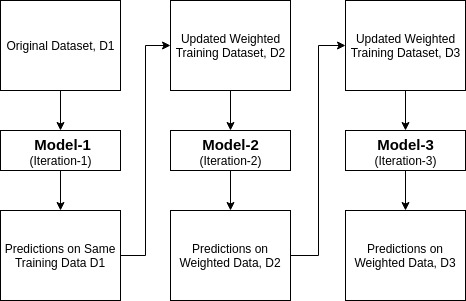

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
ab01 = AdaBoostClassifier()
ab01.fit(x_train,y_train)
pred_ab = ab01.predict(x_test)

In [74]:
result_AB = accuracy_score(y_test, pred_ab)
print("The accuracy of model ab01 is: ", result_AB*100)

The accuracy of model ab01 is:  85.04065040650407


# GRADIENT BOOSTING CLASSIFIER


>Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting.
The Gradient Boosting Classifier depends on a loss function. A custom loss function can be used, and many standardized loss functions are supported by gradient boosting classifiers, but the loss function has to be differentiable.
 Gradient boosting systems don't have to derive a new loss function every time the boosting algorithm is added, rather any differentiable loss function can be applied to the system.
Gradient boosting systems have two other necessary parts: a weak learner and an additive component. Gradient boosting systems use decision trees as their weak learners.
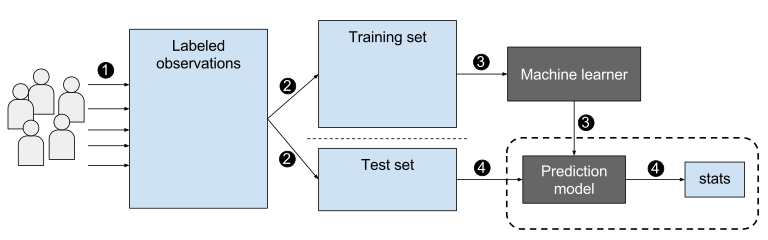

In [75]:
from sklearn.ensemble import GradientBoostingClassifier


In [139]:
#Trying out different learning rates for the classifier
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]


In [26]:
for learning_rate in lr_list:
    model_gb = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    model_gb.fit(x_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ",(model_gb.score(x_train, y_train)))
    print("Accuracy score (test): ",(model_gb.score(x_test, y_test)))

Learning rate:  0.05
Accuracy score (training):  0.8529616724738676
Accuracy score (test):  0.8617886178861789
Learning rate:  0.075
Accuracy score (training):  0.8533101045296168
Accuracy score (test):  0.8617886178861789
Learning rate:  0.1
Accuracy score (training):  0.8536585365853658
Accuracy score (test):  0.8617886178861789
Learning rate:  0.25
Accuracy score (training):  0.8623693379790941
Accuracy score (test):  0.8609756097560975
Learning rate:  0.5
Accuracy score (training):  0.8651567944250871
Accuracy score (test):  0.8601626016260162
Learning rate:  0.75
Accuracy score (training):  0.8665505226480836
Accuracy score (test):  0.8552845528455284
Learning rate:  1
Accuracy score (training):  0.8689895470383275
Accuracy score (test):  0.8544715447154472


In [76]:
mod_gb=GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_features=2, max_depth=2, random_state=0)
mod_gb.fit(x_train,y_train)
pred_gb=mod_gb.predict(x_test)
result_GB=accuracy_score(y_test,pred_gb)
print("The accuracy of mod_gb is: ", result_GB*100)


The accuracy of mod_gb is:  86.1788617886179


# Maximum Voting Classifier

>A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting. The idea is instead of creating separate dedicated models and finding the accuracy for each them, we create a single model which trains by these models and predicts output based on their combined majority of voting for each output class.
>Voting Classifier supports two types of votings:

>Hard Voting: In hard voting, the predicted output class is a class with the highest majority of votes i.e the class which had the highest probability of being predicted by each of the classifiers.
>Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class. 

In [77]:
from sklearn.ensemble import VotingClassifier

In [78]:
modVC = VotingClassifier(estimators=[('lr', mod0), ('rf', rf02),("knn",mod1),("svm",svm_01),("nb",modelNB),("ab",ab01),("gb",mod_gb)], voting='hard')

In [79]:
modVC.fit(x_train,y_train)
pred_vc=modVC.predict(x_test)
result_vc=accuracy_score(y_test,y_pred)
result_vc

0.8634146341463415

# COMPARING THE MODEL SCORES

In [143]:
models=pd.DataFrame({
"Model name": ["Logistic regression","Random Forest","KNN","SVM","Naive Bayes","Ada Boost","Gradient Boost","MaxVoting"],
"Final Scores": [result_lr,result_rf,result_knn,result_svm,result_nb,result_AB,result_GB,result_vc]
})

In [144]:
models

,Model name,Final Scores
0,Logistic regression,0.868293
1,Random Forest,0.855285
2,KNN,0.863415
3,SVM,0.863415
4,Naive Bayes,0.854472
5,Ada Boost,0.850407
6,Gradient Boost,0.861789
7,MaxVoting,0.863415


# LOGISTIC REGRESSION IS THE BEST MODEL FOR THIS DATA